In [43]:
# IMPORTS FOR ALL THE PROJECT
import numpy as np
import os
import requests
from numpy.random import default_rng
import matplotlib
import matplotlib.pyplot as plt
import tarfile
from six.moves import urllib
import pandas as pd
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
# PATH TO THE FILES

urls= ['https://raw.githubusercontent.com/Plexiglace-EL/projet-IA/main/general_data.csv',
       'https://raw.githubusercontent.com/Plexiglace-EL/projet-IA/main/manager_survey_data.csv',
       'https://raw.githubusercontent.com/Plexiglace-EL/projet-IA/main/employee_survey_data.csv',
       'https://raw.githubusercontent.com/Plexiglace-EL/projet-IA/main/in_time.csv',
       'https://raw.githubusercontent.com/Plexiglace-EL/projet-IA/main/out_time.csv']

paths = ['./datasets/general_data.csv',
         './datasets/manager_survey_data.csv',
         './datasets/employee_survey_data.csv',
         './datasets/in_time.csv',
         './datasets/out_time.csv']

In [3]:

def fetch_datas(url, path):
    localfile, header = urllib.request.urlretrieve(url, path)
    print(localfile)
    return localfile

def extractZip(path):
    with tarfile.open(path) as tf:
        tf.extractall('./datasets')


In [4]:
def import_all_files():
    print('==='*4, "BEGIN", '==='*4)


    if not os.path.exists('./datasets/'):
        print('==='*4, "CREATING \"./datasets/\" DIRECTORY", '==='*4)
        os.mkdir('./datasets')

    for i, url in enumerate(urls):
        fetch_datas(urls[i], paths[i])

    print('==='*4, "FINISHED", '==='*4)

In [5]:
def load_datas(path):
    datas = pd.read_csv(path)
    return datas

In [6]:
# FUNCTION TO DOWNLOAD THE FILES FROM ONLINE REPO TO LOCAL FOLDER

import_all_files()

============ BEGIN ============
./datasets/general_data.csv
./datasets/manager_survey_data.csv
./datasets/employee_survey_data.csv
./datasets/in_time.csv
./datasets/out_time.csv
============ FINISHED ============


In [7]:
# IMPORTING DATA IN DATAFRAME VARIABLES

general = load_datas(paths[0])
manager_survey = load_datas(paths[1])
employee_survey = load_datas(paths[2])
in_time = load_datas(paths[3])
out_time = load_datas(paths[4])

In [8]:
def converting_string_to_dates(in_time, out_time):
    # RENAMING THE UNNAMED COLUMN (ID_EMPLOYEE) FOR IT TO BE USEABLE MORE EASILY IN THE FUTURE

    in_time = in_time.rename(columns={'Unnamed: 0': 'id_employee'})
    out_time = out_time.rename(columns={'Unnamed: 0': 'id_employee'})


    # WE CAN USE THE COLUMNS OF ONLY ONE FILE BECAUSE THEY ARE BOTH THE SAME AND CONTAINS THE SAME HEADERS NAME
    # IT HAS BEEN VERIFIED USING LIST COMPARISON AND UNIQUE() CONDITION TO FILTER AND WE END WITH A TOTAL OF 262 COLUMNS
    cols = in_time.columns


    # CONVERTING THE DATES TO REAL PANDAS DATES OBJECT
    for i in cols:
        if i != 'id_employee':
            in_time[i] = pd.to_datetime(in_time[i])
            out_time[i] = pd.to_datetime(out_time[i])

    return in_time, out_time

In [9]:
#converting in and out time dataframes into pandas date obj
in_time, out_time = converting_string_to_dates(in_time, out_time)

In [10]:
# using the converted dates to calculate the working time of each employee
def calculate_working_time():

    working_time = in_time.copy()
    for i in working_time:
        if i != 'id_employee':
            working_time[i] = out_time[i] - working_time[i]
            
    return working_time

In [11]:
working_time = calculate_working_time()

In [12]:
# Encoder to convert the text data to actual values, it returns a corresponding matrix and the converted column

from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

def personnal_encoder(df, col):
    df[col] = label_enc.fit_transform(df[col])
    labels = label_enc.classes_.copy()
    for index, l in enumerate(labels):
        labels[index] = [index, l]

    return labels, df

In [13]:
businesstravel, general = personnal_encoder(general, 'BusinessTravel')
attrition, general = personnal_encoder(general, 'Attrition')
education, general = personnal_encoder(general, 'EducationField')
department, general = personnal_encoder(general, 'Department')
gender, general = personnal_encoder(general, 'Gender')
ovr18, general = personnal_encoder(general, 'Over18')
jobrole, general = personnal_encoder(general, 'JobRole')
marital, general = personnal_encoder(general, 'MaritalStatus')

In [14]:
print(type(in_time['2015-01-02'][4]), in_time['2015-01-02'][4])
print(type(out_time['2015-01-02'][4]), out_time['2015-01-02'][4])
in_time, out_time = converting_string_to_dates(in_time, out_time)
print(type(in_time['2015-01-02'][4]), in_time['2015-01-02'][4])
print(type(out_time['2015-01-02'][4]), out_time['2015-01-02'][4])

<class 'pandas._libs.tslibs.timestamps.Timestamp'> 2015-01-02 10:28:17
<class 'pandas._libs.tslibs.timestamps.Timestamp'> 2015-01-02 18:31:37
<class 'pandas._libs.tslibs.timestamps.Timestamp'> 2015-01-02 10:28:17
<class 'pandas._libs.tslibs.timestamps.Timestamp'> 2015-01-02 18:31:37


In [15]:
def calculate_working_time():

    working_time = in_time.copy()
    for i in working_time:
        if i != 'id_employee':
            working_time[i] = out_time[i] - working_time[i]


    return working_time

In [16]:
general

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,1,1,0,...,1.0,0,11,8,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,1,2,0,...,0.0,0,23,8,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,3,1,...,1.0,0,15,8,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,4,1,...,3.0,0,11,8,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,5,1,...,4.0,0,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,2,1,5,4,3,1,4406,0,...,3.0,0,17,8,1,10.0,5,3,0,2
4406,29,0,2,1,2,4,3,1,4407,1,...,2.0,0,15,8,0,10.0,2,3,0,2
4407,25,0,2,1,25,2,1,1,4408,1,...,0.0,0,20,8,0,5.0,4,4,1,2
4408,42,0,2,2,18,2,3,1,4409,1,...,0.0,0,14,8,1,10.0,2,9,7,8


In [17]:
general.describe()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,...,4391.000000,4410.0,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,0.161224,1.607483,1.260544,9.192517,2.912925,2.247619,1.0,2205.500000,0.600000,...,2.694830,0.0,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,0.367780,0.665304,0.527673,8.105026,1.023933,1.331067,0.0,1273.201673,0.489954,...,2.498887,0.0,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,0.000000,...,0.000000,0.0,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.0,1103.250000,0.000000,...,1.000000,0.0,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,1.000000,7.000000,3.000000,2.000000,1.0,2205.500000,1.000000,...,2.000000,0.0,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,2.000000,14.000000,4.000000,3.000000,1.0,3307.750000,1.000000,...,4.000000,0.0,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,2.000000,29.000000,5.000000,5.000000,1.0,4410.000000,1.000000,...,9.000000,0.0,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [18]:
# Adding the calculated mean value of the working time of each employee to the main dataframe
mean_time = working_time.copy()
mean_time = mean_time.drop('id_employee', axis=1)
general['mean'] = mean_time.mean(axis = 1)
general['mean'] = general['mean'].dt.total_seconds() / 3600
general['mean'] = round(general['mean'], 2)
# Adding the rest of the datas (from the survey)
general['EnvironmentSatisfaction'] = employee_survey['EnvironmentSatisfaction']
general['JobSatisfaction'] = employee_survey['JobSatisfaction']
general['WorkLifeBalance'] = employee_survey['WorkLifeBalance']
general['JobInvolvement'] = manager_survey['JobInvolvement']
general['PerformanceRating'] = manager_survey['PerformanceRating']

# Reformating the column of the existing general DF for comprehension
general = general.reindex(columns=['EmployeeID','Age','Attrition','BusinessTravel','Department','DistanceFromHome','Education','EducationField','EmployeeCount','Gender','JobLevel','JobRole','MaritalStatus','MonthlyIncome','NumCompaniesWorked','Over18','PercentSalaryHike','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager','mean','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance','JobInvolvement','PerformanceRating'])
general

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,mean,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,0,2,2,6,2,1,1,0,...,6,1,0,0,7.37,3.0,4.0,2.0,3,3
1,2,31,1,1,1,10,1,1,1,0,...,3,5,1,4,7.72,3.0,2.0,4.0,2,4
2,3,32,0,1,1,17,4,4,1,1,...,2,5,0,3,7.01,2.0,2.0,1.0,3,3
3,4,38,0,0,1,2,5,1,1,1,...,5,8,7,5,7.19,4.0,4.0,3.0,2,3
4,5,32,0,2,1,10,1,3,1,1,...,2,6,0,4,8.01,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,42,0,2,1,5,4,3,1,0,...,5,3,0,2,8.52,4.0,1.0,3.0,3,3
4406,4407,29,0,2,1,2,4,3,1,1,...,2,3,0,2,6.09,4.0,4.0,3.0,2,3
4407,4408,25,0,2,1,25,2,1,1,1,...,4,4,1,2,7.71,1.0,3.0,3.0,3,4
4408,4409,42,0,2,2,18,2,3,1,1,...,2,9,7,8,9.49,4.0,1.0,3.0,2,3


In [19]:
general.isna().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
mean                        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [20]:
#We fill the blanks with Median values of each columns
general["NumCompaniesWorked"] = general["NumCompaniesWorked"].fillna(general["NumCompaniesWorked"].median())
general["TotalWorkingYears"] = general["TotalWorkingYears"].fillna(general["TotalWorkingYears"].median())

environmentSatisMean = general["EnvironmentSatisfaction"].mean(axis = 0)
jobSatisMean = general["JobSatisfaction"].mean(axis=0)
worklifemean = general["WorkLifeBalance"].mean(axis=0)

for a, value in general['EnvironmentSatisfaction'].isnull().iteritems():
    if value:
        general['EnvironmentSatisfaction'][a] = environmentSatisMean

for a, value in general["JobSatisfaction"].isnull().iteritems():
    if value:
        general['JobSatisfaction'][a] = jobSatisMean

for a, value in general["WorkLifeBalance"].isnull().iteritems():
    if value:
        general['WorkLifeBalance'][a] = worklifemean
        
general.isna().sum()

C:\Users\PCPORT\AppData\Local\Temp/ipykernel_9336/2661094890.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  general['EnvironmentSatisfaction'][a] = environmentSatisMean
C:\Users\PCPORT\AppData\Local\Temp/ipykernel_9336/2661094890.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  general['JobSatisfaction'][a] = jobSatisMean
C:\Users\PCPORT\AppData\Local\Temp/ipykernel_9336/2661094890.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

EmployeeID                 0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
mean                       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64

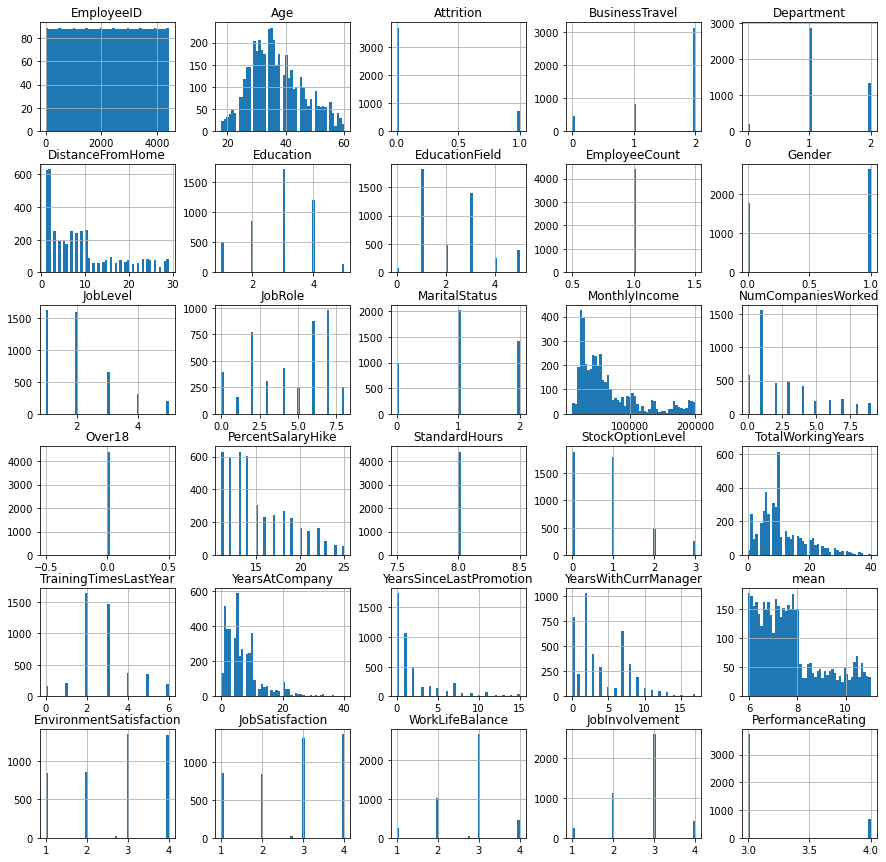

In [21]:
general.hist(bins=50, figsize=(15,15))
plt.show()

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

X = general.copy() # A new copy of data set# 

X.drop("Over18", axis=1, inplace=True) 

X.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,mean,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,0,2,2,6,2,1,1,0,...,6,1,0,0,7.37,3.0,4.0,2.0,3,3
1,2,31,1,1,1,10,1,1,1,0,...,3,5,1,4,7.72,3.0,2.0,4.0,2,4
2,3,32,0,1,1,17,4,4,1,1,...,2,5,0,3,7.01,2.0,2.0,1.0,3,3
3,4,38,0,0,1,2,5,1,1,1,...,5,8,7,5,7.19,4.0,4.0,3.0,2,3
4,5,32,0,2,1,10,1,3,1,1,...,2,6,0,4,8.01,4.0,1.0,3.0,3,3


In [23]:
corr=X.corr()

(29.5, -0.5)

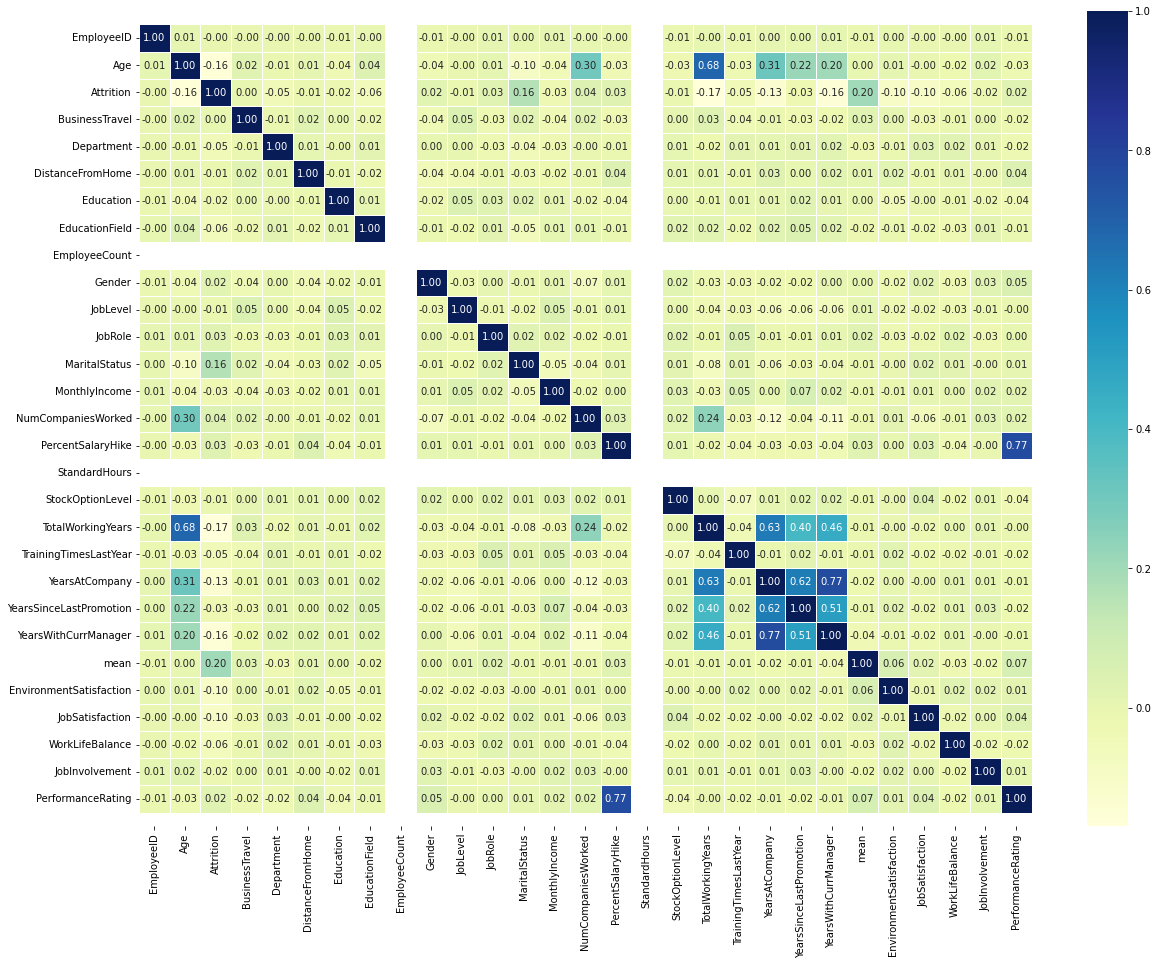

In [24]:
corr_matrix = X.corr()
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [25]:
just_trying = general.head(10)

from sklearn.preprocessing import LabelEncoder
print(just_trying)

cats = just_trying['BusinessTravel'].unique()
label_enc = LabelEncoder()
just_trying['BusinessTravel'] = label_enc.fit_transform(just_trying['BusinessTravel'])

just_trying

   EmployeeID  Age  Attrition  BusinessTravel  Department  DistanceFromHome  \
0           1   51          0               2           2                 6   
1           2   31          1               1           1                10   
2           3   32          0               1           1                17   
3           4   38          0               0           1                 2   
4           5   32          0               2           1                10   
5           6   46          0               2           1                 8   
6           7   28          1               2           1                11   
7           8   29          0               2           1                18   
8           9   31          0               2           1                 1   
9          10   25          0               0           1                 7   

   Education  EducationField  EmployeeCount  Gender  ...  \
0          2               1              1       0  ...   
1         

C:\Users\PCPORT\AppData\Local\Temp/ipykernel_9336/1096744429.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  just_trying['BusinessTravel'] = label_enc.fit_transform(just_trying['BusinessTravel'])


,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,mean,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,0,2,2,6,2,1,1,0,...,6,1,0,0,7.37,3.0,4.0,2.0,3,3
1,2,31,1,1,1,10,1,1,1,0,...,3,5,1,4,7.72,3.0,2.0,4.0,2,4
2,3,32,0,1,1,17,4,4,1,1,...,2,5,0,3,7.01,2.0,2.0,1.0,3,3
3,4,38,0,0,1,2,5,1,1,1,...,5,8,7,5,7.19,4.0,4.0,3.0,2,3
4,5,32,0,2,1,10,1,3,1,1,...,2,6,0,4,8.01,4.0,1.0,3.0,3,3
5,6,46,0,2,1,8,3,1,1,0,...,5,7,7,7,10.80,3.0,2.0,2.0,3,3
6,7,28,1,2,1,11,2,3,1,1,...,2,0,0,0,6.92,1.0,3.0,1.0,3,4
7,8,29,0,2,1,18,3,1,1,1,...,2,0,0,0,6.73,1.0,2.0,3.0,3,4
8,9,31,0,2,1,1,3,1,1,1,...,2,9,7,8,7.24,2.0,4.0,3.0,3,4
9,10,25,0,0,1,7,4,3,1,0,...,2,6,1,5,7.08,2.0,1.0,3.0,3,3


C:\Users\PCPORT\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\PCPORT\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


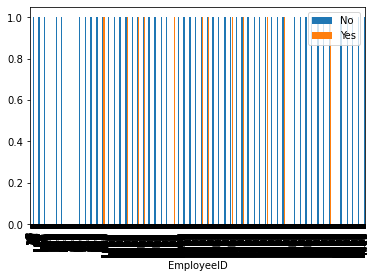

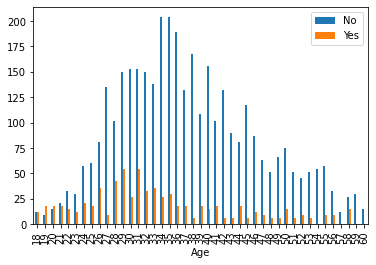

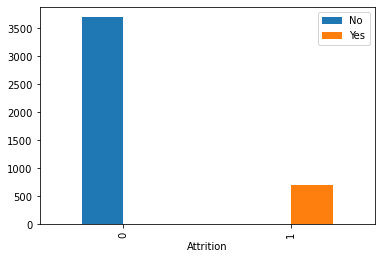

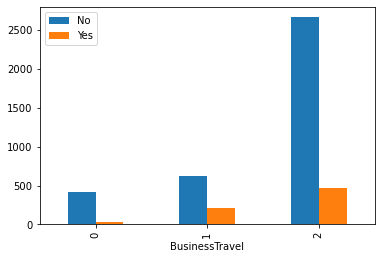

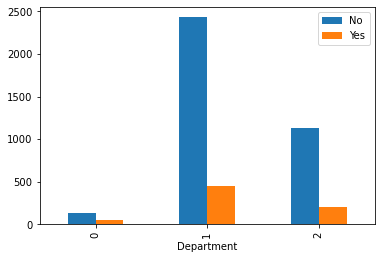

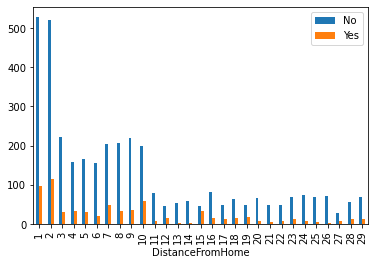

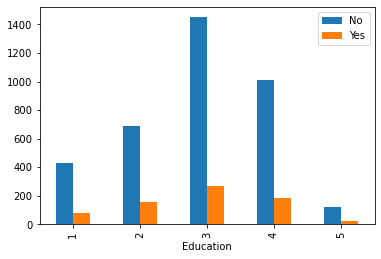

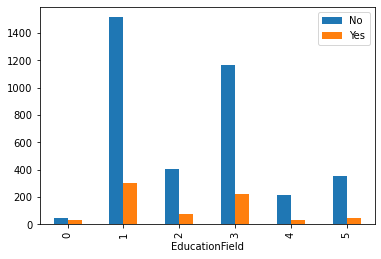

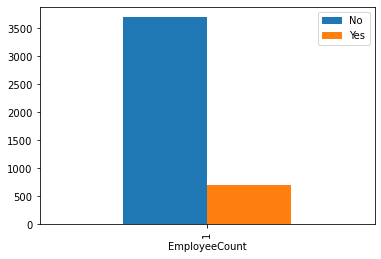

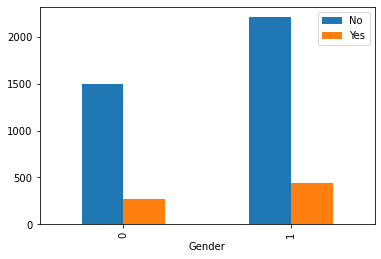

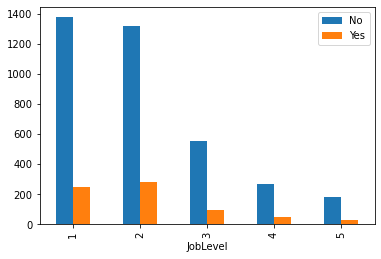

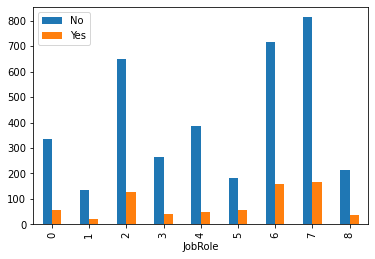

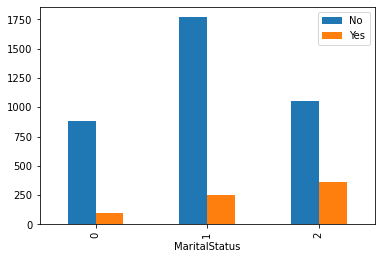

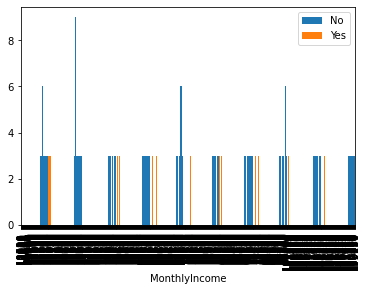

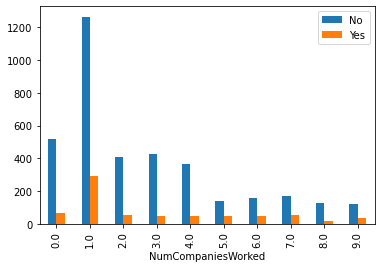

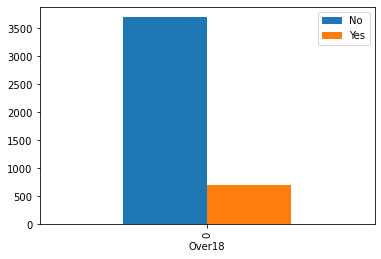

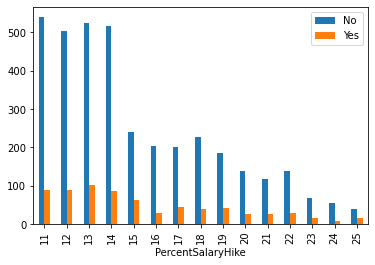

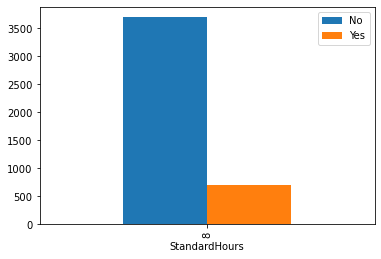

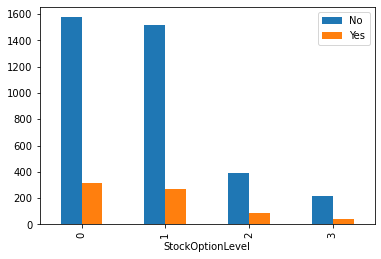

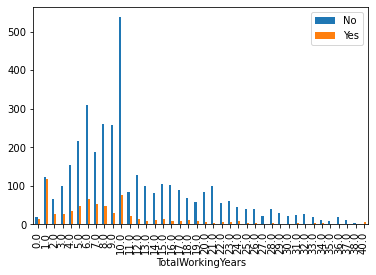

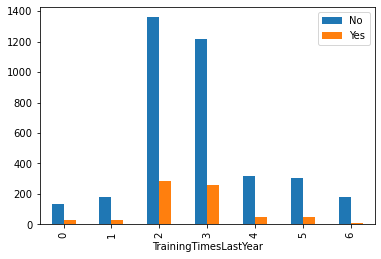

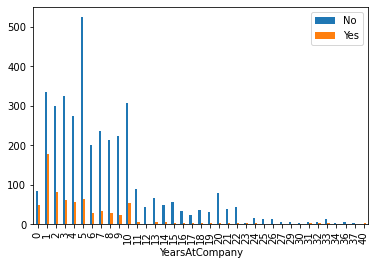

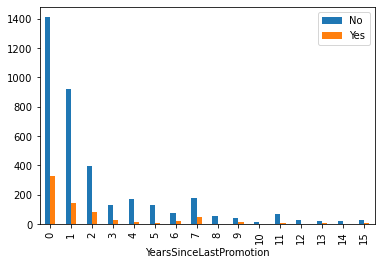

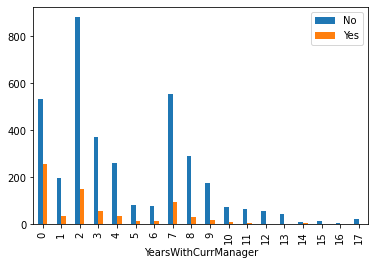

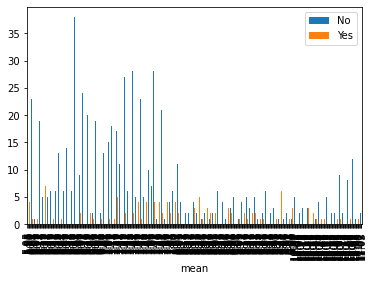

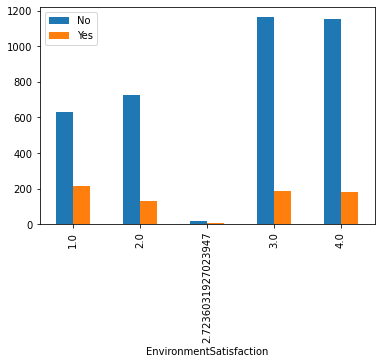

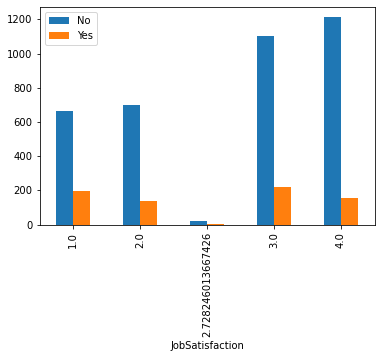

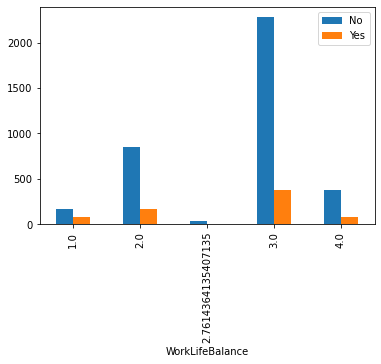

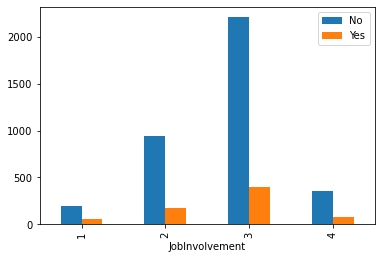

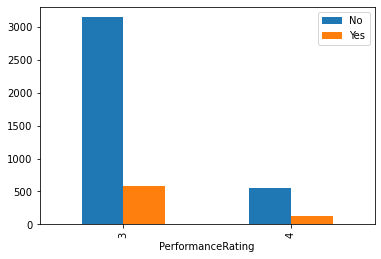

In [26]:
#We show the graphics with the correlation between the Attrition of every employees
for col in general.columns : 
    pd.crosstab(general[col], general.Attrition).plot(kind="bar")
    plt.xlabel(col)
    plt.legend(["No","Yes"])


In [42]:
y = general['Attrition']

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
general.head()
for train_index, test_index in split.split(general, general['Attrition']):
    strat_train_set = general.loc[train_index]
    strat_test_set = general.loc[test_index]
    y_train = strat_train_set['Attrition']
    y_test = strat_test_set['Attrition']
    
for set_ in (strat_train_set, strat_test_set):
    set_.drop("Attrition", axis=1, inplace=True)
    set_.drop("EmployeeID", axis=1, inplace=True)

In [44]:
numerical_features = make_column_selector(dtype_include=np.number)
categorical_features = make_column_selector(dtype_exclude=np.number)

#numerical_features_test = ['']

numerical_pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

full_pipeline = make_column_transformer((numerical_pipeline,numerical_features),
                                       (categorical_pipeline,categorical_features))

In [46]:
pipe = make_pipeline(full_pipeline)
X_train = pipe.fit_transform(strat_train_set)
X_test = pipe.transform(strat_test_set)

In [47]:
#Création de mon modèle avec full_pipeline et l'algo
clf_neighbors = KNeighborsClassifier()
#Entrainement du modèle
clf_neighbors.fit(X_train, y_train)
# Scoring
print('Test score :', clf_neighbors.score(X_test, y_test))
clf_neighbors_predicted = clf_neighbors.predict(X_test)

Test score : 0.8151927437641724


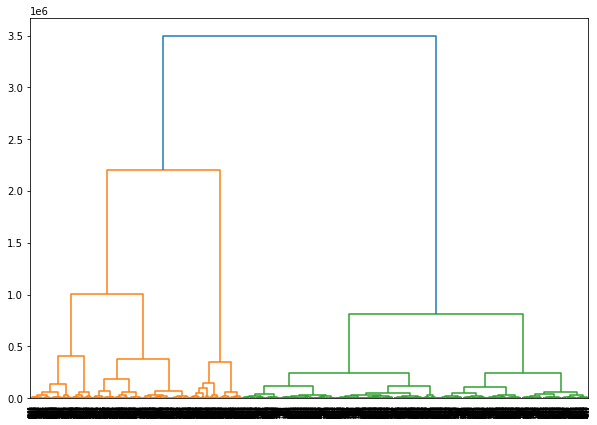

In [49]:
plt.figure(figsize=(10, 7))
dendrogram(linkage(general, method='ward'), orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve
clf_neighbors_predicted = clf_neighbors_predicted.reshape(-1,1)

In [52]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
clf_neighbors_predicted_num = ordinal_encoder.fit_transform(clf_neighbors_predicted)

In [55]:
precision_score_kn = precision_score(y_test,clf_neighbors_predicted_num)
recall_score_kn = recall_score(y_test,clf_neighbors_predicted_num)
f1_score_score_kn = f1_score(y_test,clf_neighbors_predicted_num)

In [57]:
scoring = {}
scoring['precision_score_kn'] = round(precision_score_kn*100,2)
scoring['recall_score_kn'] = round(recall_score_kn*100,2)
scoring['f1_score_score_kn'] = round(f1_score_score_kn*100,2)

In [58]:
print("precision_score_kn :" + str(precision_score_kn))
print("recall_score_kn :" + str(recall_score_kn))
print("f1_score_score_kn :" + str(f1_score_score_kn) +'\n')

print("precision_score_kn :" + str(round(precision_score_kn*100,2))+" %")
print("recall_score_kn :" + str(round(recall_score_kn*100,2))+ " %")
print("f1_score_score_kn :" + str(round(f1_score_score_kn*100,2)) + " %")

precision_score_kn :0.3894736842105263
recall_score_kn :0.2605633802816901
f1_score_score_kn :0.31223628691983124

precision_score_kn :38.95 %
recall_score_kn :26.06 %
f1_score_score_kn :31.22 %


In [60]:
from sklearn.model_selection import cross_val_score

val_score_kneighbors = []
print("cross_val_score KNeighbors :", end='') 
print(cross_val_score(clf_neighbors, X_train, y_train, cv=5, scoring='accuracy').mean())

cross_val_score KNeighbors :0.8333365479275914


In [62]:
from sklearn.metrics import confusion_matrix
cf_mat_kn = pd.DataFrame(confusion_matrix(y_test, clf_neighbors.predict(X_test)))
cf_mat_kn

,0,1
0,682,58
1,105,37


C:\Users\PCPORT\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


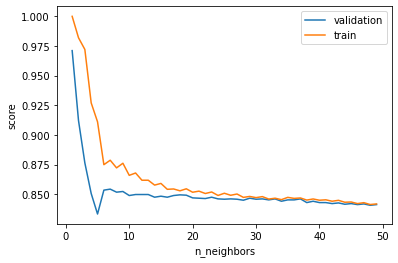

In [64]:
# Calcul du score de cross validationn en splitant notre train set en 5 jeux de données
# et en testant k_neighbors=1 < 50, k++
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, validation_curve
model = KNeighborsClassifier()
k = np.arange(1, 50)

train_score, val_score = validation_curve(model, X_train, y_train,"n_neighbors", k, cv=5)

plt.plot(k,val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

In [65]:
params = {
    'n_neighbors' : np.arange(1,20),
    'metric':['euclidean','manhattan']
}

grid_kn = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv=5)
grid_kn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [66]:
grid_kn.best_params_

{'metric': 'manhattan', 'n_neighbors': 1}

In [67]:
grid_kn.best_score_

0.9722242983143472

In [68]:
best_model_kn = grid_kn.best_estimator_
best_model_kn.fit(X_train, y_train)
best_model_kn_pr = best_model_kn.predict(X_test)

In [69]:
# Matrice de confusion
cf_mat_kn = confusion_matrix(y_test, best_model_kn.predict(X_test))
print(cf_mat_kn)

[[737   3]
 [  3 139]]


<AxesSubplot:>

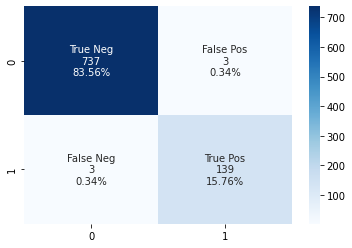

In [70]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_mat_kn.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_mat_kn.flatten()/np.sum(cf_mat_kn)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_mat_kn, annot=labels,fmt='', cmap='Blues')